In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [2]:
import os
import zipfile

local_zip = './tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
  
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

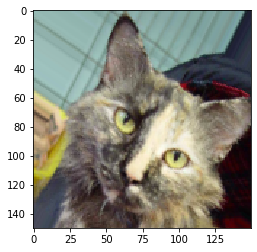

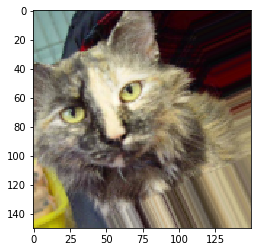

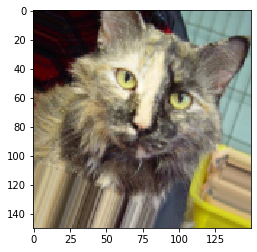

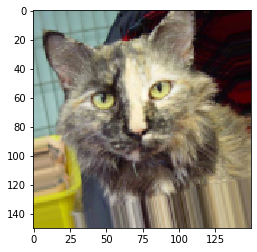

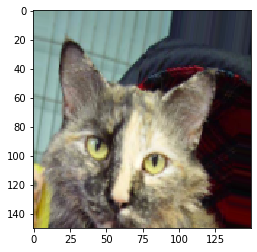

In [103]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_cats_dir, train_cat_fnames[2])
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 5 == 0:
        break


In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255 # 특성 스케일링
    , rotation_range = 40 # 이미지 회전 범위
    , width_shift_range = 0.2 # 랜덤하게 평행 이동 시키는 범위(원본에 대한 비율 값)
    , height_shift_range = 0.2 # 수평
    , shear_range = 0.2 # 임의 전단변환 범위
    , zoom_range = 0.2 # 임의확대, 축소 범위
    , horizontal_flip = True, # True = 50% 확률로 이미지르 수평으로 뒤집음(비대칭성이 없을때 효과적)
)

In [16]:
val_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir
    , target_size = (150, 150)
    , batch_size = 20
    , class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [21]:
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [22]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop


In [32]:
img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16,3, activation = 'relu')(img_input)
print(x)
x = layers.MaxPooling2D(2)(x)
print(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

Tensor("conv2d_6/Identity:0", shape=(None, 148, 148, 16), dtype=float32)
Tensor("max_pooling2d_5/Identity:0", shape=(None, 74, 74, 16), dtype=float32)


In [89]:
# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)
print(x)

Tensor("flatten_3/Identity:0", shape=(None, 18496), dtype=float32)


In [90]:
# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

In [91]:
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

In [92]:
# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

In [95]:
output

<tf.Tensor 'dense_1/Identity:0' shape=(None, 1) dtype=float32>

In [93]:
# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [94]:
model

In [ ]:
from tqdm import tqdm

In [101]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose=2
)

Epoch 1/30
100/100 - 63s - loss: 0.6670 - acc: 0.6125 - val_loss: 0.6617 - val_acc: 0.6160
Epoch 2/30
100/100 - 58s - loss: 0.6852 - acc: 0.6305 - val_loss: 0.6296 - val_acc: 0.6590
Epoch 3/30
100/100 - 64s - loss: 0.6474 - acc: 0.6390 - val_loss: 0.6373 - val_acc: 0.6150
Epoch 4/30
100/100 - 59s - loss: 0.6306 - acc: 0.6610 - val_loss: 0.7494 - val_acc: 0.5730
Epoch 5/30
100/100 - 71s - loss: 0.6249 - acc: 0.6545 - val_loss: 0.5833 - val_acc: 0.7010
Epoch 6/30
100/100 - 60s - loss: 0.6136 - acc: 0.6645 - val_loss: 0.6326 - val_acc: 0.6460
Epoch 7/30
100/100 - 58s - loss: 0.6063 - acc: 0.6825 - val_loss: 0.5592 - val_acc: 0.7160
Epoch 8/30
100/100 - 60s - loss: 0.5958 - acc: 0.6915 - val_loss: 0.5481 - val_acc: 0.7190
Epoch 9/30
100/100 - 58s - loss: 0.5880 - acc: 0.6900 - val_loss: 0.5505 - val_acc: 0.7210
Epoch 10/30
100/100 - 60s - loss: 0.5950 - acc: 0.6990 - val_loss: 0.6043 - val_acc: 0.6700
Epoch 11/30
100/100 - 57s - loss: 0.5854 - acc: 0.6905 - val_loss: 0.5429 - val_acc: 0.72

Text(0.5, 1.0, 'Training and validation loss')

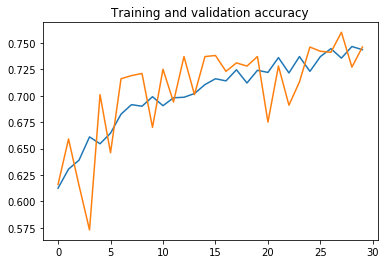

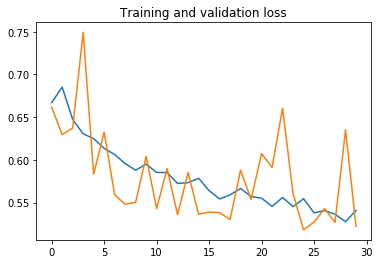

In [104]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)